# Impact of Transaction Characteristics on Fraud Detection

In [34]:
from google.colab import files
import io
import pandas as pd

# Upload a CSV file
uploaded = files.upload()

# Print the keys of the uploaded dictionary to confirm the filename
print(uploaded.keys())

# Dynamically retrieve the first key from the uploaded dictionary
file_key = next(iter(uploaded))

# Convert the bytes to a file-like object and read it into a pandas DataFrame
credit_card_data = pd.read_csv(io.BytesIO(uploaded[file_key]))

# Display the first few rows to understand the structure
print("Initial Data Preview:")
display(credit_card_data.head())

print("Data info")
credit_card_data.info()

Saving CreditCardData.csv to CreditCardData (1).csv
dict_keys(['CreditCardData (1).csv'])
Initial Data Preview:


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank       

### Data Cleaning:

- Removed leading/trailing whitespaces from column names.
- Converted the Amount column from string to numeric after removing currency symbols.
- Converted the Date column to datetime format.
- Handled missing values by filling missing values in other columns using mean for numerical and mode for categorical columns.

In [35]:
# 1.1 Remove leading/trailing whitespaces from column names
credit_card_data.columns = credit_card_data.columns.str.strip()

In [36]:
# 1.2 Convert 'Amount' from string to numeric after removing currency symbol
credit_card_data['Amount'] = credit_card_data['Amount'].replace('[£,]', '', regex=True).astype(float)

In [37]:
# 1.3 Convert 'Date' to datetime format
credit_card_data['Date'] = pd.to_datetime(credit_card_data['Date'], format='%d-%b-%y')

In [38]:
# 1.4 Handle missing values (if any)
print("Missing Values Before Handling:")
print(credit_card_data.isnull().sum())

Missing Values Before Handling:
Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64


In [39]:
# Fill missing values in other columns with appropriate strategies (e.g., mean for numerical, mode for categorical)
for column in credit_card_data.columns:
    if credit_card_data[column].dtype == 'object':
        credit_card_data[column].fillna(credit_card_data[column].mode()[0], inplace=True)
    else:
        credit_card_data[column].fillna(credit_card_data[column].mean(), inplace=True)

In [40]:
# print("Missing Values After Handling:")
print("Missing Values After Handling:")
print(credit_card_data.isnull().sum())

Missing Values After Handling:
Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


##Data Quality Assessment:

- Checked for any remaining missing values.
- Identified and reported the number of duplicate rows.
- Checked the balance of the target variable (fraudulent vs. non-fraudulent transactions).
- Displayed summary statistics of the dataset.

In [41]:
# 3.1 Check for any remaining missing values
print("Final Missing Values Check:")
print(credit_card_data.isnull().sum())

Final Missing Values Check:
Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


In [42]:
# 3.2 Check for duplicates
duplicates = credit_card_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [43]:
# 3.3 Check the balance of the target variable
fraud_counts = credit_card_data['Fraud'].value_counts()
print("Fraud Class Distribution:")
print(fraud_counts)

Fraud Class Distribution:
Fraud
0    92805
1     7195
Name: count, dtype: int64


In [44]:
# 3.4 Summary statistics of the dataset
print("Summary Statistics:")
print(credit_card_data.describe())

Summary Statistics:
                                Date           Time         Amount  \
count                         100000  100000.000000  100000.000000   
mean   2020-10-13 12:02:43.296000256      14.562870     112.578515   
min              2020-10-13 00:00:00       0.000000       5.000000   
25%              2020-10-13 00:00:00      10.000000      17.000000   
50%              2020-10-14 00:00:00      15.000000      30.000000   
75%              2020-10-14 00:00:00      19.000000     208.000000   
max              2020-10-16 00:00:00      24.000000     400.000000   
std                              NaN       5.308195     123.430190   

                 Age          Fraud  
count  100000.000000  100000.000000  
mean       44.993770       0.071950  
min        15.000000       0.000000  
25%        38.200000       0.000000  
50%        44.900000       0.000000  
75%        51.700000       0.000000  
max        86.100000       1.000000  
std         9.948494       0.258406  


In [45]:
# Display the cleaned and transformed dataset
print("Cleaned and Transformed Data Preview:")
display(credit_card_data.head())

Cleaned and Transformed Data Preview:


,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,2020-10-14,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,2020-10-14,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,2020-10-14,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,2020-10-13,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,2020-10-13,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [46]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Transaction ID          100000 non-null  object        
 1   Date                    100000 non-null  datetime64[ns]
 2   Day of Week             100000 non-null  object        
 3   Time                    100000 non-null  int64         
 4   Type of Card            100000 non-null  object        
 5   Entry Mode              100000 non-null  object        
 6   Amount                  100000 non-null  float64       
 7   Type of Transaction     100000 non-null  object        
 8   Merchant Group          100000 non-null  object        
 9   Country of Transaction  100000 non-null  object        
 10  Shipping Address        100000 non-null  object        
 11  Country of Residence    100000 non-null  object        
 12  Gender                  100000 

## Exploratory data Analysis (EDA)

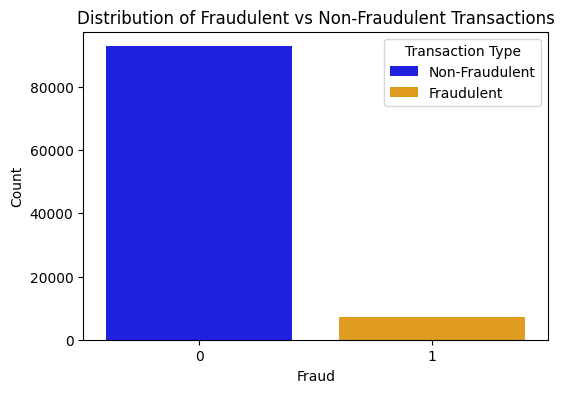

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
colors = ['blue', 'orange']

# Create a new column to use with the hue parameter for correct color mapping
credit_card_data['Fraud_Labels'] = credit_card_data['Fraud'].map({0: 'Non-Fraudulent', 1: 'Fraudulent'})

# Distribution of the target variable
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Fraud', data=credit_card_data, hue='Fraud_Labels', palette=colors, dodge=False)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Count')

# Adding legend
ax.legend(title="Transaction Type")

plt.show()

# Drop the temporary column
credit_card_data.drop(columns=['Fraud_Labels'], inplace=True)




- The dataset shows a highly imbalanced distribution between fraudulent and non-fraudulent transactions
- Class weight adjustment will be employed to handle the imbalance in the dataset. This technique will help the model become more effective at identifying fraudulent transactions,

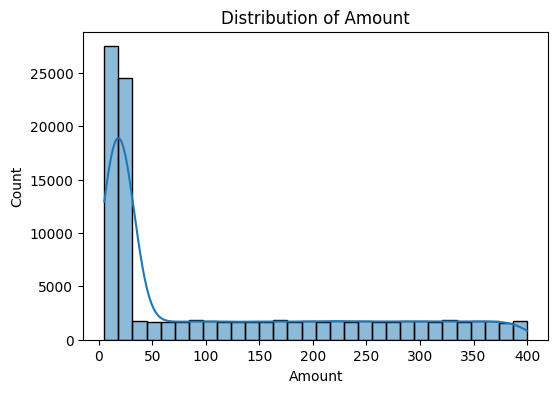

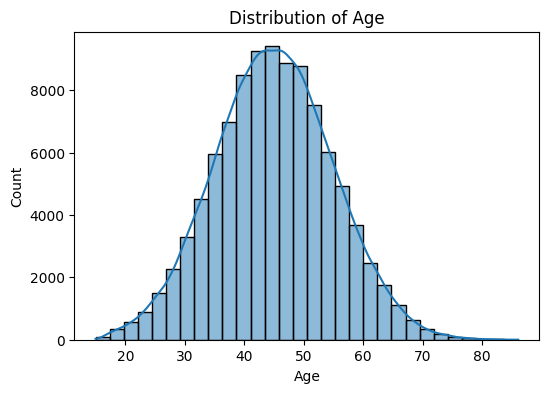

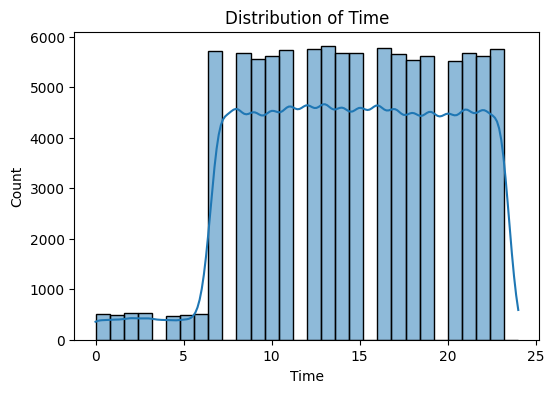

In [47]:
# Distribution of numerical features
numerical_features = ['Amount', 'Age', 'Time']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(credit_card_data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

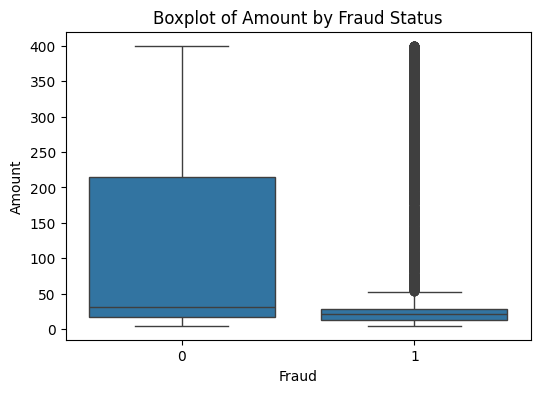

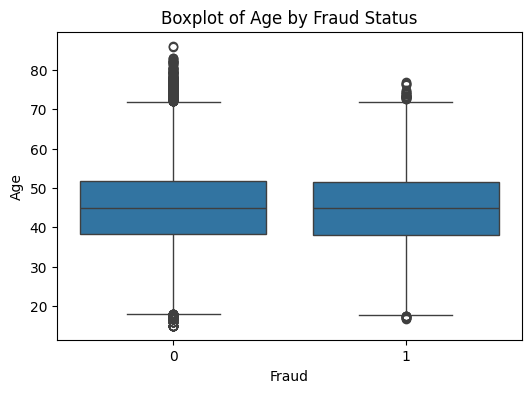

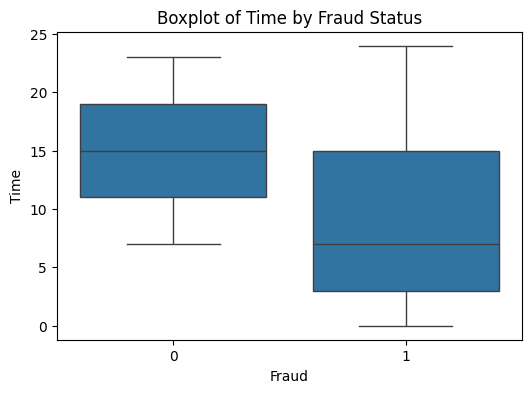

In [48]:
# Boxplots for numerical features by Fraud status
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Fraud', y=feature, data=credit_card_data)
    plt.title(f'Boxplot of {feature} by Fraud Status')
    plt.show()

## Analyzing Transaction Characteristics

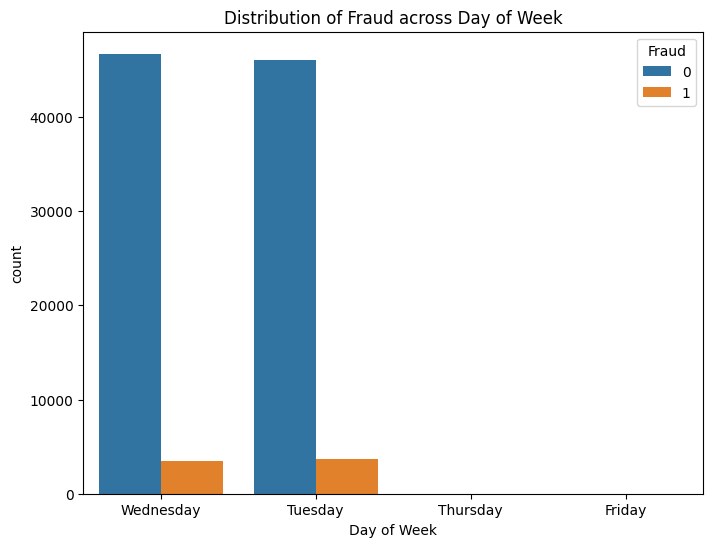

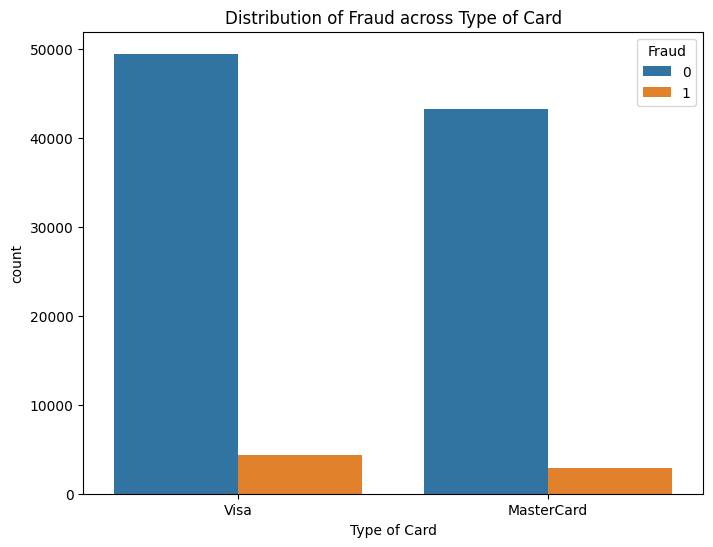

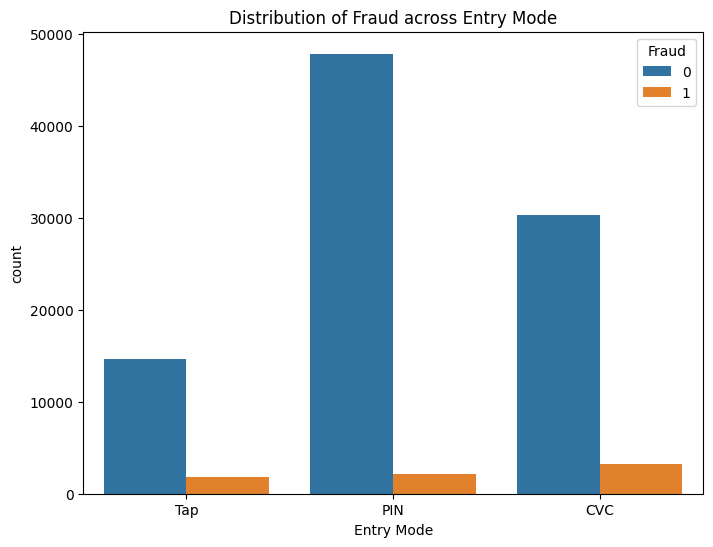

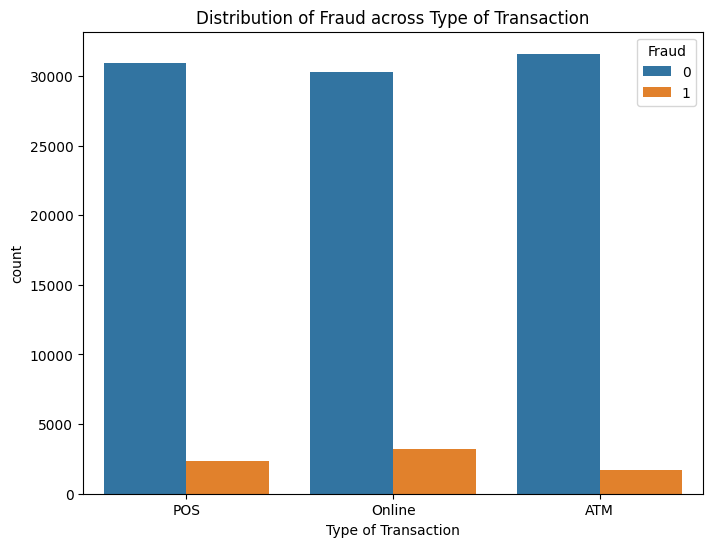

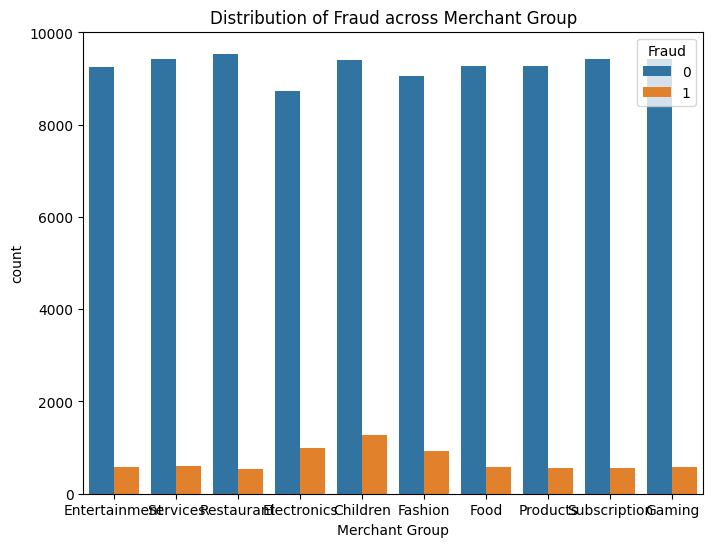

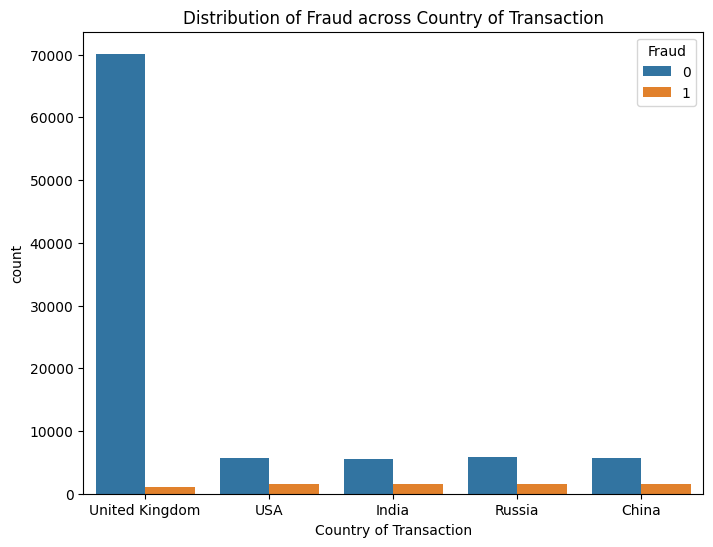

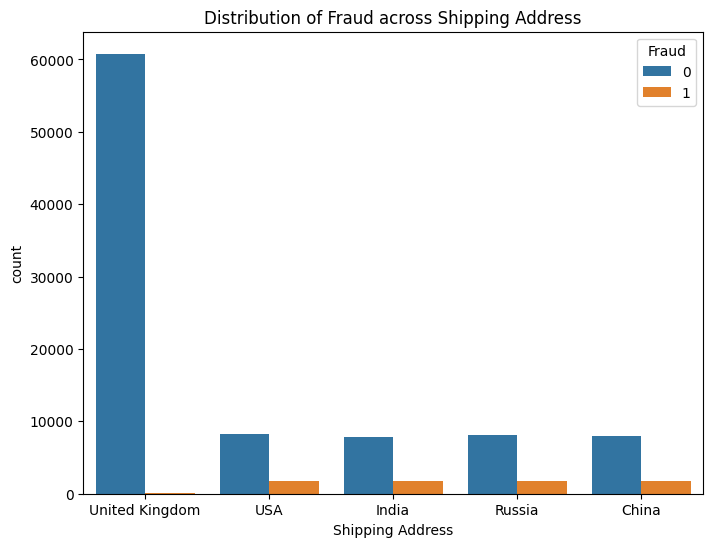

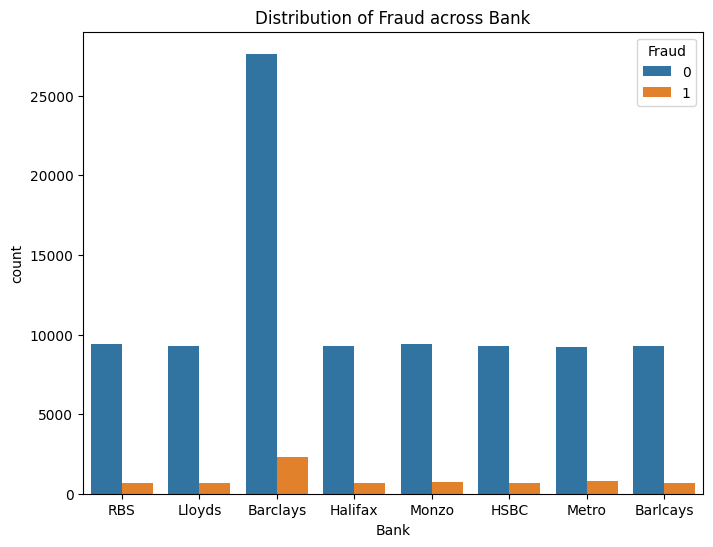

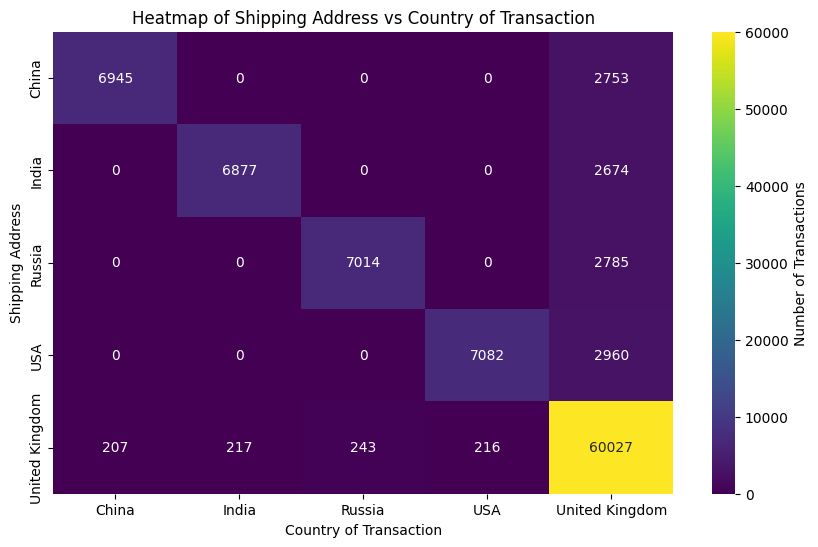

In [49]:
# Countplots for categorical features
categorical_columns = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group',
                       'Country of Transaction', 'Shipping Address', 'Bank']
for feature in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Fraud', data=credit_card_data)
    plt.title(f'Distribution of Fraud across {feature}')
    plt.show()

# Shipping Address vs Country of Transaction vs Fraud

# Group by Shipping Address, Country of Transaction, and Fraud, then count the occurrences
grouped = credit_card_data.groupby(['Shipping Address', 'Country of Transaction', 'Fraud']).size().reset_index(name='Count')

# Pivot the data to get Shipping Address vs Country of Transaction with Fraud as columns
pivot = grouped.pivot_table(index=['Shipping Address', 'Country of Transaction'], columns='Fraud', values='Count', fill_value=0).reset_index()

# Flatten the multi-level columns
pivot.columns = ['Shipping Address', 'Country of Transaction', 'Not Fraud', 'Fraud']

# Melt the data for easier plotting with seaborn
melted = pivot.melt(id_vars=['Shipping Address', 'Country of Transaction'], value_vars=['Not Fraud', 'Fraud'], var_name='Fraud Status', value_name='Count')

# Create a heatmap to show the density of fraud occurrences
heatmap_data = grouped.pivot_table(index='Shipping Address', columns='Country of Transaction', values='Count', aggfunc='sum', fill_value=0)

# Plotting the heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Number of Transactions'})
plt.title('Heatmap of Shipping Address vs Country of Transaction')
plt.xlabel('Country of Transaction')
plt.ylabel('Shipping Address')
plt.show()


## Analyzing Demographic Factors

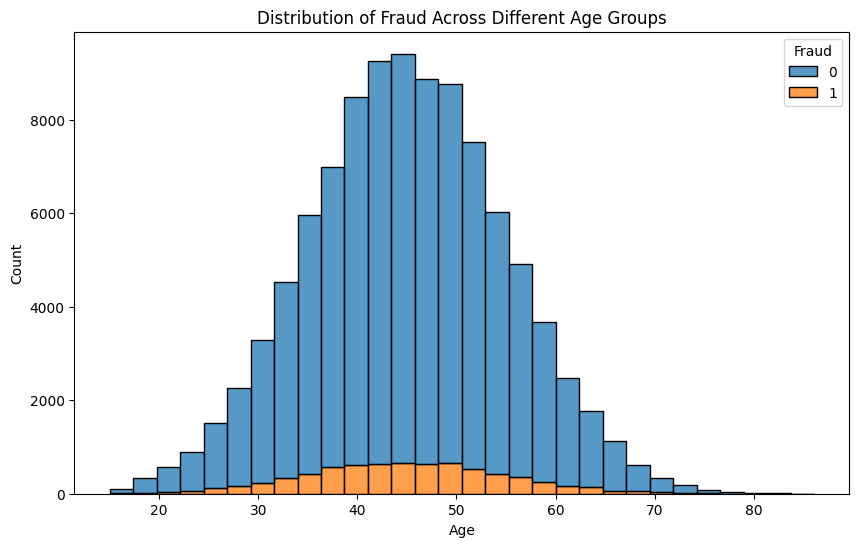

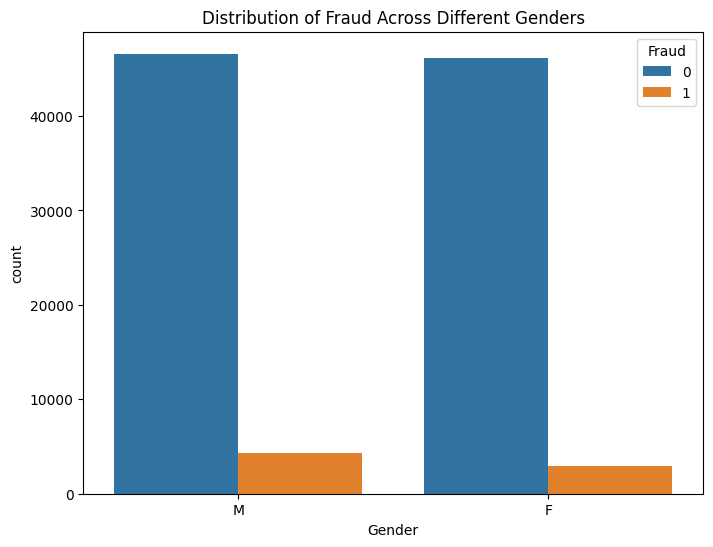

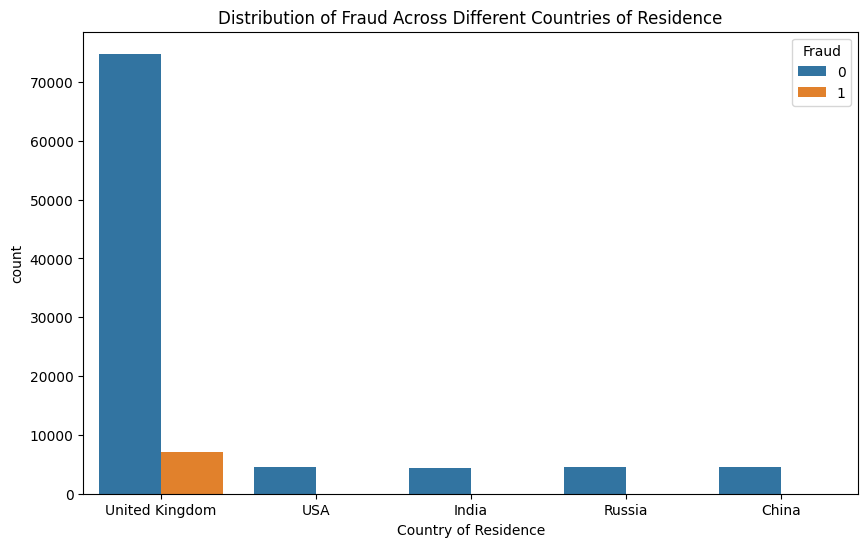

In [50]:
# Plotting the distribution of fraud across different age groups
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_card_data, x='Age', hue='Fraud', multiple='stack', bins=30)
plt.title('Distribution of Fraud Across Different Age Groups')
plt.show()

# Plotting the distribution of fraud across different genders
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Fraud', data=credit_card_data)
plt.title('Distribution of Fraud Across Different Genders')
plt.show()

# Plotting the distribution of fraud across different countries of residence
plt.figure(figsize=(10, 6))
sns.countplot(x='Country of Residence', hue='Fraud', data=credit_card_data)
plt.title('Distribution of Fraud Across Different Countries of Residence')
plt.show()

## Feature Engineering

In [51]:
# Drop the 'Transaction ID'and 'Date' columns as they are not needed for analysis
credit_card_data = credit_card_data.drop(columns=['Transaction ID', 'Date'])

In [52]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group',
                       'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank']
credit_card_data = pd.get_dummies(credit_card_data, columns=categorical_columns, drop_first=True)

In [53]:
# 2.2 Normalize numerical features (e.g., Amount, Age)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_card_data[['Amount', 'Age']] = scaler.fit_transform(credit_card_data[['Amount', 'Age']])

- Used one-hot encoding to convert categorical variables into numerical format.
- Normalized numerical features such as Amount and Age using StandardScaler.

### Display Data After Feature Engineering

In [54]:
print("Transformed Data Preview:")
display(credit_card_data.head())
credit_card_data.info()

Transformed Data Preview:


,Time,Amount,Age,Fraud,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Type of Card_Visa,Entry Mode_PIN,Entry Mode_Tap,...,Country of Residence_USA,Country of Residence_United Kingdom,Gender_M,Bank_Barlcays,Bank_HSBC,Bank_Halifax,Bank_Lloyds,Bank_Metro,Bank_Monzo,Bank_RBS
0,19,-0.871578,-1.989635,0,False,False,True,True,False,True,...,False,True,True,False,False,False,False,False,False,True
1,17,1.421227,0.463010,0,False,False,True,False,True,False,...,True,False,False,False,False,False,True,False,False,False
2,14,-0.871578,-0.280825,0,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,14,-0.685237,0.603736,0,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
4,23,-0.174825,-0.703001,1,False,True,False,True,False,False,...,False,True,True,False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Time                                   100000 non-null  int64  
 1   Amount                                 100000 non-null  float64
 2   Age                                    100000 non-null  float64
 3   Fraud                                  100000 non-null  int64  
 4   Day of Week_Thursday                   100000 non-null  bool   
 5   Day of Week_Tuesday                    100000 non-null  bool   
 6   Day of Week_Wednesday                  100000 non-null  bool   
 7   Type of Card_Visa                      100000 non-null  bool   
 8   Entry Mode_PIN                         100000 non-null  bool   
 9   Entry Mode_Tap                         100000 non-null  bool   
 10  Type of Transaction_Online             100000 non-null  b

## Correlation Matrix

Fraud                                    1.000000
Country of Transaction_India             0.160778
Country of Transaction_USA               0.153828
Country of Transaction_Russia            0.143032
Shipping Address_USA                     0.142080
Shipping Address_India                   0.142042
Shipping Address_Russia                  0.133677
Country of Residence_United Kingdom      0.118424
Entry Mode_Tap                           0.068503
Type of Transaction_Online               0.064949
Gender_M                                 0.047627
Merchant Group_Electronics               0.037230
Type of Card_Visa                        0.034793
Merchant Group_Fashion                   0.026516
Day of Week_Tuesday                      0.011618
Bank_Metro                               0.010912
Day of Week_Thursday                     0.004016
Bank_Monzo                               0.000140
Age                                     -0.002838
Bank_Lloyds                             -0.003098


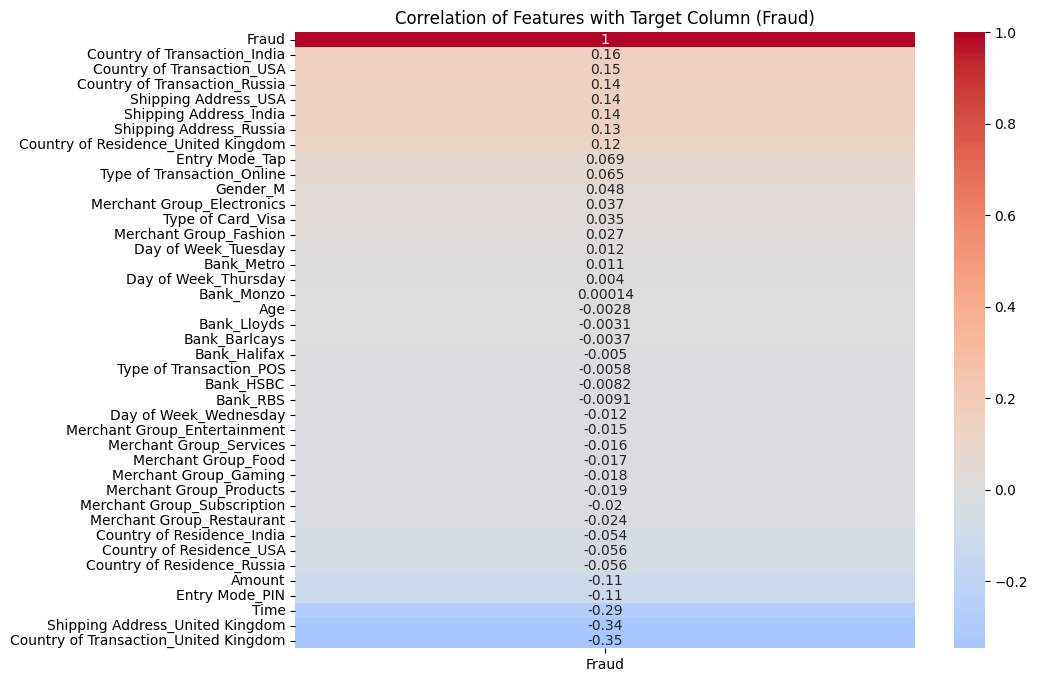

In [55]:
# Calculating the correlation matrix
correlation_matrix = credit_card_data.corr()

# Calculating the correlation of each feature with the target column 'Fraud'
correlation_with_target = credit_card_data.corr()['Fraud'].sort_values(ascending=False)

# Displaying the correlation with the target column
print(correlation_with_target)

# Plotting the heatmap of correlation with target column 'Fraud'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Fraud']].sort_values(by='Fraud', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Features with Target Column (Fraud)')
plt.show()


## Model Building Hypertuning and Evaluation

### Logistic Regression  Model With Class Weight Adjustment

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Splitting the dataset into features and target variable
X = credit_card_data.drop('Fraud', axis=1)
y = credit_card_data['Fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model with class weight adjustment
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression with Class Weight Adjustment")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nROC-AUC:", roc_auc_score(y_test, y_pred_proba_lr))



Logistic Regression with Class Weight Adjustment

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     27791
           1       0.54      0.95      0.68      2209

    accuracy                           0.94     30000
   macro avg       0.77      0.94      0.82     30000
weighted avg       0.96      0.94      0.94     30000


Confusion Matrix:
 [[25972  1819]
 [  115  2094]]

ROC-AUC: 0.9822000110473444


#### Hyperparameter Tuning Logistic Regression (With Class Weight Adjustment)

In [66]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Splitting the dataset into features and target variable
X = credit_card_data.drop('Fraud', axis=1)
y = credit_card_data['Fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Logistic Regression with class weight adjustment
param_grid = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'class_weight': ['balanced']},
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear'], 'class_weight': ['balanced']},
]

# Initialize the GridSearchCV object with class weight adjustment
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_lr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_lr = best_lr_model.predict(X_test)
y_pred_proba_lr = best_lr_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression with Hyperparameter Tuning and Class Weight Adjustment")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nBest Parameters:\n", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nROC-AUC:", roc_auc_score(y_test, y_pred_proba_lr))


Logistic Regression with Hyperparameter Tuning and Class Weight Adjustment

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.96     27791
           1       0.54      0.95      0.69      2209

    accuracy                           0.94     30000
   macro avg       0.77      0.94      0.83     30000
weighted avg       0.96      0.94      0.94     30000


Best Parameters:
 {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

Confusion Matrix:
 [[25988  1803]
 [  116  2093]]

ROC-AUC: 0.9819140050404365


### Random Forest Model With Class Weight Adjustment

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Splitting the dataset into features and target variable
X = credit_card_data.drop('Fraud', axis=1)
y = credit_card_data['Fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest model with class weight adjustment
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest with Class Weight Adjustment")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest with Class Weight Adjustment

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     27791
           1       0.97      0.81      0.88      2209

    accuracy                           0.98     30000
   macro avg       0.98      0.90      0.94     30000
weighted avg       0.98      0.98      0.98     30000


Confusion Matrix:
 [[27741    50]
 [  424  1785]]

ROC-AUC: 0.9921856815893072


#### Hyperparameter Tuning Random Forest Model With Class Weight Adjustment

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Splitting the dataset into features and target variable
X = credit_card_data.drop('Fraud', axis=1)
y = credit_card_data['Fraud']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Random Forest with class weight adjustment
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

# Initialize the GridSearchCV object with class weight adjustment
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest with Hyperparameter Tuning and Class Weight Adjustment")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nROC-AUC:\n", roc_auc_score(y_test, y_pred_proba_rf))
print("\nBest Parameters:\n", grid_search.best_params_)



Random Forest with Hyperparameter Tuning and Class Weight Adjustment

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     27791
           1       0.97      0.81      0.88      2209

    accuracy                           0.98     30000
   macro avg       0.98      0.90      0.94     30000
weighted avg       0.98      0.98      0.98     30000


Confusion Matrix:
 [[27741    50]
 [  424  1785]]

ROC-AUC:
 0.9921856815893072

Best Parameters:
 {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Feature Importance of Best Model (Hypertuned Random Forest With Class Weight Adjustment)

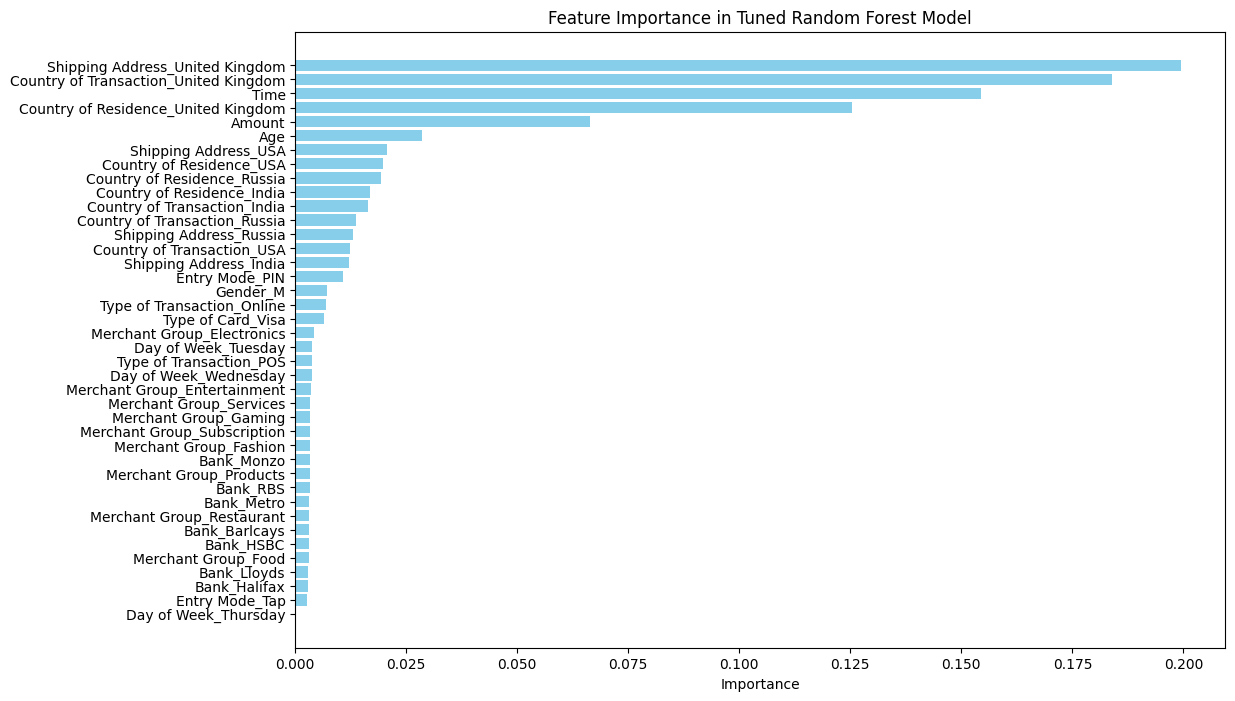

In [69]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Tuned Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


- The top 5 features are Shipping Address_United Kingdom, Country of Transaction_United Kingdom, Time, Country of Residence (United Kingdom), and Amount.
- The model relies heavily on temporal, geographic, and transaction amount features to predict fraud.
- Understanding and focusing on these top features can help improve fraud detection strategies.

## Visualizing Best Model (Tuned Random Forest) Prediction Accuracy

#### Confusion Matrix

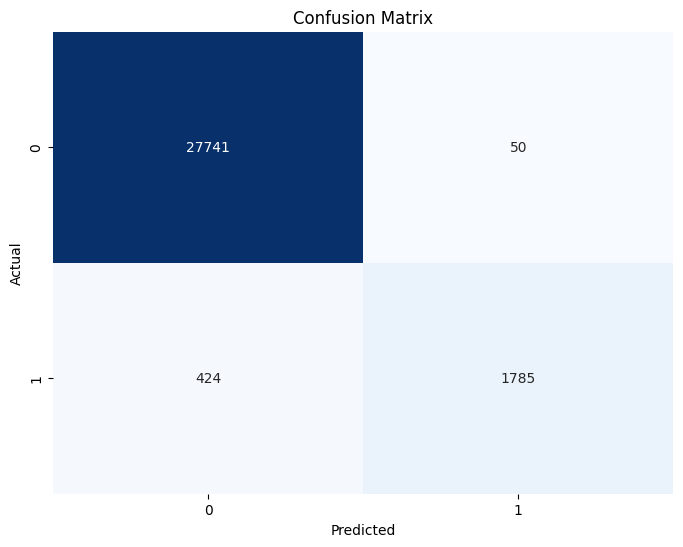

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Make predictions on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



- True Negatives (TN): 27,741 - Transactions correctly predicted as non-fraudulent.
- False Positives (FP): 40 - Transactions incorrectly predicted as fraudulent.
- False Negatives (FN): 424 - Transactions incorrectly predicted as non-fraudulent.
- True Positives (TP): 1,785 - Transactions correctly predicted as fraudulent.

The model is highly accurate in detecting non-fraudulent transactions.
It performs reasonably well in detecting fraudulent transactions

#### ROC Curve

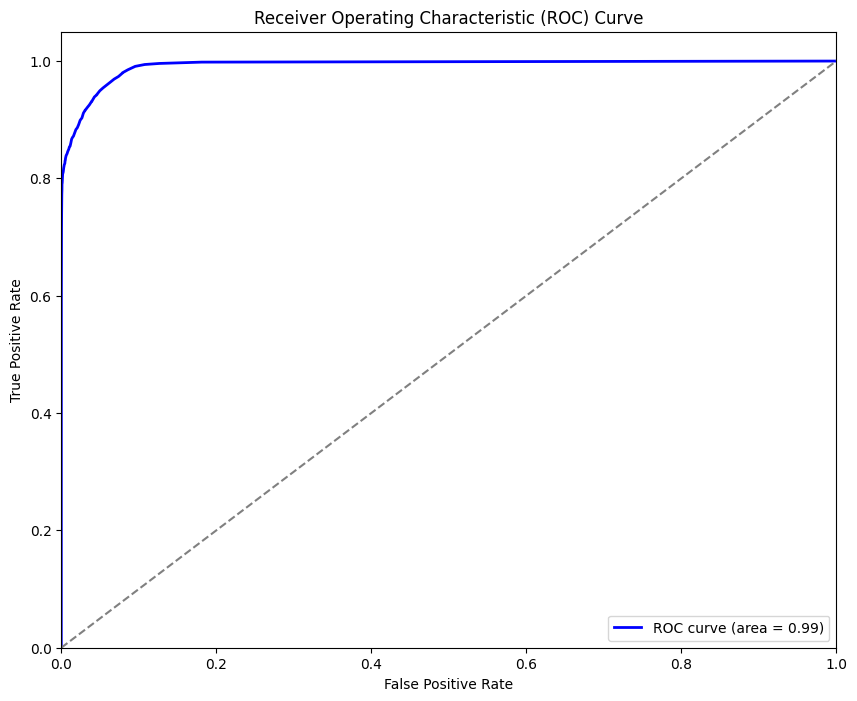

ROC AUC Score: 0.99


In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the ROC AUC score
print(f"ROC AUC Score: {roc_auc:.2f}")


- The AUC (Area Under the Curve) of 0.99 Indicates excellent model performance.
- The ROC curve shows that the model performs exceptionally well in distinguishing between fraudulent and non-fraudulent transactions, as indicated by the high AUC of 0.99.


#### Save the Model

In [ ]:
import joblib

# Save the model to a file
joblib_file = "best_rf_model.pkl"
joblib.dump(best_rf_model, joblib_file)